<a href="https://colab.research.google.com/github/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/Chronos_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/amazon-science/chronos-forecasting.git

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-3uevbxq5
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-3uevbxq5
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit eb7bdfc047de3e7af972b4ee7cf23a7968b7daa3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch  # PyTorch to convert values ino torch tensors.
from chronos import ChronosPipeline

In [16]:
dataframe = pd.read_csv('/content/HistoricalQuotes.csv')
dataframe.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [4]:
'''initialize CHRONOS pipeline'''
pipeline = ChronosPipeline.from_pretrained("amazon/chronos-t5-tiny",
                                            device_map = "auto",
                                            torch_dtype = torch.bfloat16)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

In [24]:
train = dataframe.head(2468) # train data
test = dataframe.tail(50) # test data

In [33]:
test[' Open'] =test[' Open'].apply(lambda x: float(x.replace('$','')))
test[' Open']

<ipython-input-33-009c26b8d769>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[' Open'] =test[' Open'].apply(lambda x: float(x.replace('$','')))


2468    35.7500
2469    34.8157
2470    36.2614
2471    36.1471
2472    37.5557
2473    37.6914
2474    38.4728
2475    37.5743
2476    37.6071
2477    38.1814
2478    38.8400
2479    38.2843
2480    36.8914
2481    36.9721
2482    35.5057
2483    35.2900
2484    35.5100
2485    35.1114
2486    35.0400
2487    34.5514
2488    34.6000
2489    34.4900
2490    34.3486
2491    34.2457
2492    34.0286
2493    33.5678
2494    33.9271
2495    33.6414
2496    33.8004
2497    33.2857
2498    32.7071
2499    32.9886
2500    32.5200
2501    32.2343
2502    31.4957
2503    32.1128
2504    32.0143
2505    32.1286
2506    32.0257
2507    32.1971
2508    32.4814
2509    31.9871
2510    31.9757
2511    31.1871
2512    31.4300
2513    30.7057
2514    29.8971
2515    29.8486
2516    29.9900
2517    29.3928
Name:  Open, dtype: float64

In [25]:
train[' High'] =train[' High'].apply(lambda x: float(x.replace('$','')))
train[' High']

<ipython-input-25-c00e6e8d1645>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[' High'] =train[' High'].apply(lambda x: float(x.replace('$','')))


0       278.4100
1       286.0000
2       297.8800
3       302.5300
4       304.1800
          ...   
2463     36.5971
2464     36.6400
2465     37.8571
2466     37.5900
2467     37.1271
Name:  High, Length: 2468, dtype: float64

In [26]:
train[' Low'] =train[' Low'].apply(lambda x: float(x.replace('$','')))
train[' Low']

<ipython-input-26-29f9c8cf995c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[' Low'] =train[' Low'].apply(lambda x: float(x.replace('$','')))


0       256.3700
1       272.9600
2       286.5000
3       286.1300
4       289.2300
          ...   
2463     35.3871
2464     35.6428
2465     36.6286
2466     36.9571
2467     35.7857
Name:  Low, Length: 2468, dtype: float64

In [27]:
train[' Open'] =train[' Open'].apply(lambda x: float(x.replace('$','')))
train[' Open']

<ipython-input-27-518aaee9a10b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[' Open'] =train[' Open'].apply(lambda x: float(x.replace('$','')))


0       257.2600
1       281.1000
2       286.5300
3       300.9500
4       297.2600
          ...   
2463     36.3857
2464     36.4521
2465     37.6028
2466     37.0350
2467     35.9771
Name:  Open, Length: 2468, dtype: float64

In [28]:
to_predict = torch.tensor(train[' Open'])# variable for training and predict
horizon = 50 # forecasting steps

In [29]:
forecast = pipeline.predict(to_predict, horizon)

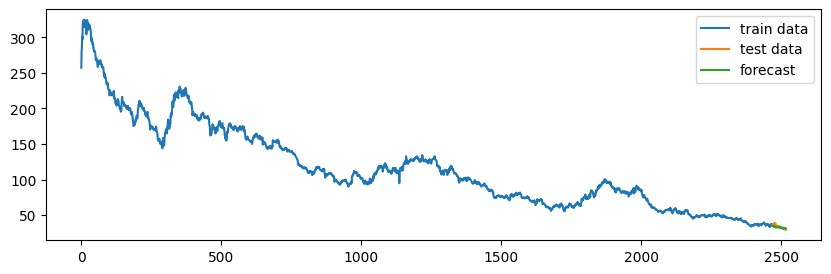

In [34]:
up, median, low = np.quantile(forecast[0].numpy(),[0.1,0.5,0.9], axis = 0)

'''plot the forecat'''
plt.subplots(figsize=(10,3))
plt.plot(train[' Open'], label = 'train data')
plt.plot(test[' Open'], label = 'test data')
plt.plot(np.arange(2468,2518),up, label = 'forecast')
plt.legend()